# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


###CHECKING IF DATA IS GOOD, IF FEATURES NEEDS ENCODING AND CHECKING FOR LINEAR RELATIONSHIP B/W FEATURE AND OUTPUT

In [3]:
df.shape


(804, 12)

In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


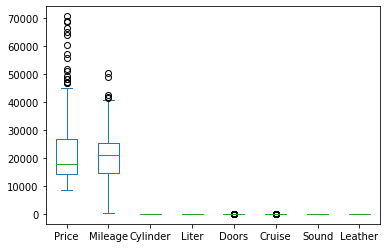

In [5]:
#df.plot(kind='box')
df.plot(kind='box')

In [6]:
Q3= np.quantile(df['Mileage'], 0.75)
Q1= np.quantile(df['Mileage'], 0.25)
IQR= Q3-Q1

mini= Q1 - (1.5 * IQR)
maxi= Q3 + (1.5 * IQR)
print(Q3, Q1, IQR)
print(mini, maxi)

25213.0 14623.5 10589.5
-1260.75 41097.25


In [7]:
df.loc[df['Mileage'] > maxi, 'Mileage']= maxi

In [8]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [9]:
df.duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
799    False
800    False
801    False
802    False
803    False
Length: 804, dtype: bool

In [10]:
df.dtypes

Price       float64
Mileage     float64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

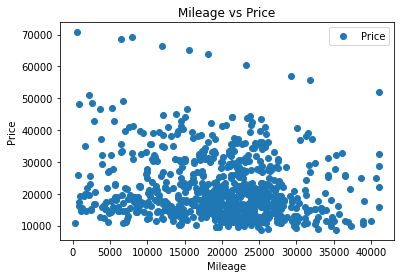

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


In [11]:
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage', 'Price']].corr()

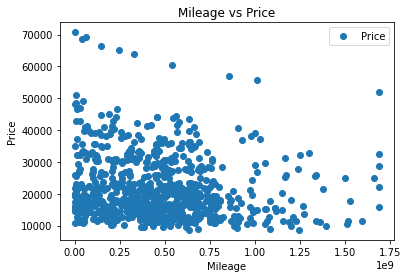

,Mileage_sqr,Price
Mileage_sqr,1.000000,-0.125361
Price,-0.125361,1.000000


In [12]:
df['Mileage_sqr']= np.square(df['Mileage'])
#df.groupby('Mileage_sqr')['Price'].mean().plot()
df.plot(x='Mileage_sqr', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_sqr', 'Price']].corr()

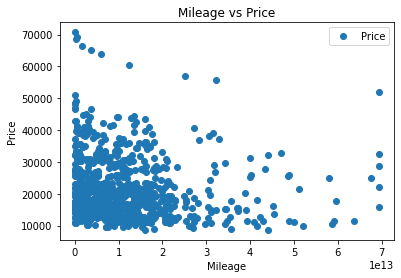

,Mileage_cube,Price
Mileage_cube,1.000000,-0.099925
Price,-0.099925,1.000000


In [13]:
df['Mileage_cube']= pow(df['Mileage'], 3)
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage_cube', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_cube', 'Price']].corr()

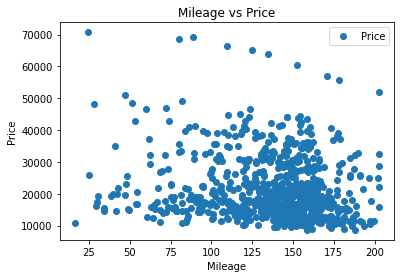

,Mileage_SqrRt,Price
Mileage_SqrRt,1.000000,-0.151018
Price,-0.151018,1.000000


In [14]:
df['Mileage_SqrRt']= np.sqrt(df['Mileage'])
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage_SqrRt', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_SqrRt', 'Price']].corr()

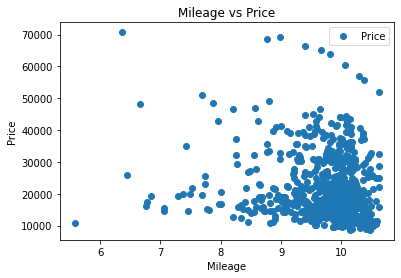

,logOf_Mileage,Price
logOf_Mileage,1.000000,-0.146153
Price,-0.146153,1.000000


In [15]:
df['logOf_Mileage']= np.log(df['Mileage'])
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='logOf_Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['logOf_Mileage', 'Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


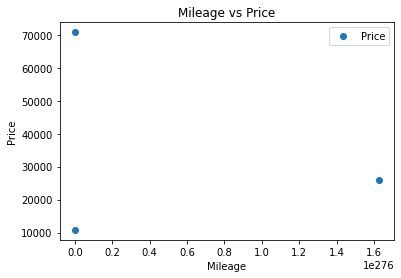

,Mileage_exponent,Price
Mileage_exponent,NaN,-0.0
Price,-0.0,1.0


In [16]:
df['Mileage_exponent']= np.exp(df['Mileage'])
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage_exponent', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_exponent', 'Price']].corr()

As There is NO LINEAR RELATION OR LOW CORRELATION B/W MILEAGE AND PRICE.
Hence we Cannot perform Linear Regression on them.

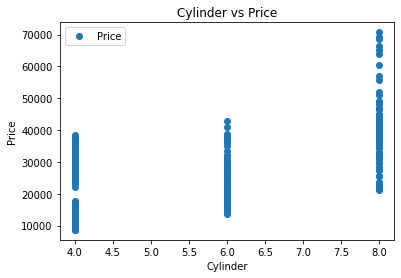

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [17]:
#df.groupby('Cylinder')['Price'].mean().plot()
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

df[['Cylinder', 'Price']].corr()

Cylinder has +ve linear relation (good correlation) with Price. Hence can be  used for performing Linear Regression

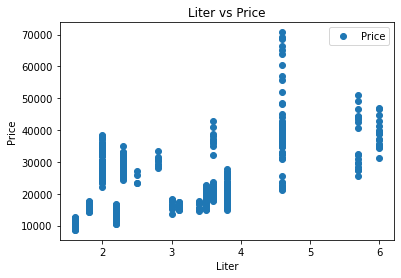

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [18]:
#df.groupby('Liter')['Price'].mean().plot()
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

df[['Liter', 'Price']].corr()

Liter has Good Correlation with Price. Hence can be used for performing Linear Regression

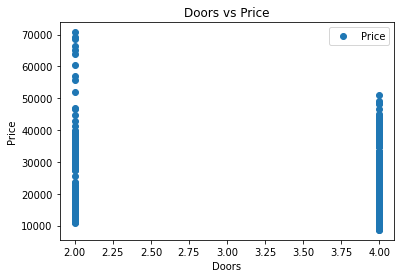

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [19]:
#df.groupby('Doors')['Price'].mean().plot()
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['Doors', 'Price']].corr()

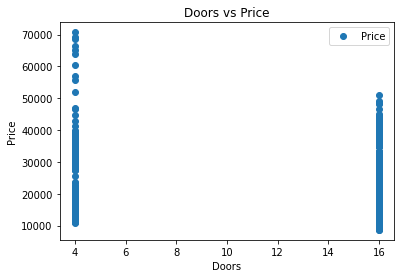

,Doors_sqr,Price
Doors_sqr,1.00000,-0.13875
Price,-0.13875,1.00000


In [20]:
df['Doors_sqr']= np.square(df['Doors'])
#df.groupby('Door_sqr')['Price'].mean().plot()
df.plot(x='Doors_sqr', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['Doors_sqr', 'Price']].corr()

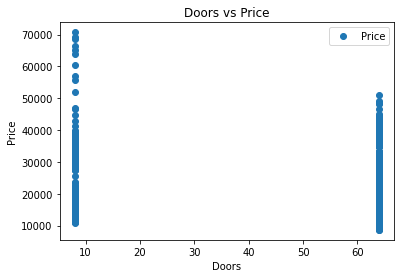

,Doors_cube,Price
Doors_cube,1.00000,-0.13875
Price,-0.13875,1.00000


In [21]:
df['Doors_cube']= pow(df['Doors'], 3)
#df.groupby('Doors_cube')['Price'].mean().plot()
df.plot(x='Doors_cube', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['Doors_cube', 'Price']].corr()

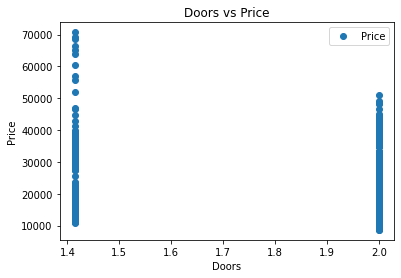

,Doors_SqrRt,Price
Doors_SqrRt,1.00000,-0.13875
Price,-0.13875,1.00000


In [22]:
df['Doors_SqrRt']= np.sqrt(df['Doors'])
#df.groupby('Doors_SqrRt')['Price'].mean().plot()
df.plot(x='Doors_SqrRt', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['Doors_SqrRt', 'Price']].corr()

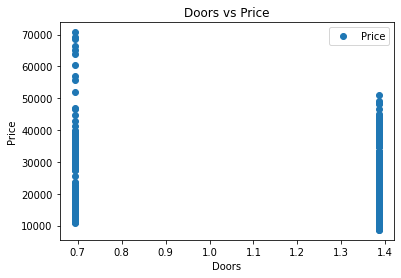

,logOf_Doors,Price
logOf_Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [23]:
df['logOf_Doors']= np.log(df['Doors'])
#df.groupby('logOf_Doors')['Price'].mean().plot()
df.plot(x='logOf_Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['logOf_Doors', 'Price']].corr()

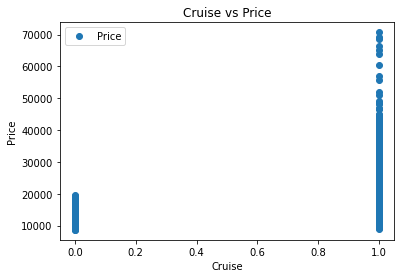

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [24]:
#df.groupby('Cruise')['Price'].mean().plot()
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

df[['Cruise', 'Price']].corr()

Cruise has Good Correlation with Price. Hence can be used for performing Linear Regression

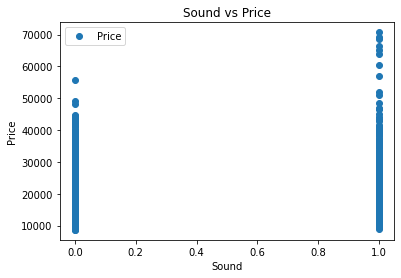

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [25]:
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show() 

df[['Sound', 'Price']].corr()

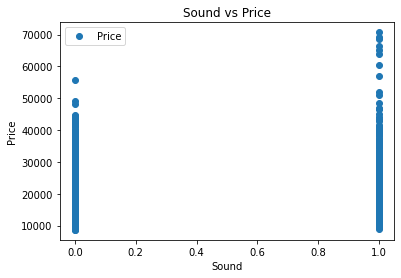

,Sound_sqr,Price
Sound_sqr,1.000000,-0.124348
Price,-0.124348,1.000000


In [26]:
df['Sound_sqr']= np.square(df['Sound'])
#df.groupby('Sound_sqr')['Price'].mean().plot()
df.plot(x='Sound_sqr', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['Sound_sqr', 'Price']].corr()

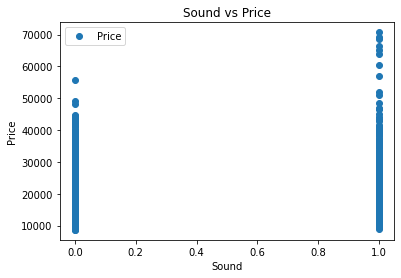

,Sound_cube,Price
Sound_cube,1.000000,-0.124348
Price,-0.124348,1.000000


In [27]:
df['Sound_cube']= pow(df['Sound'], 3)
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='Sound_cube', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['Sound_cube', 'Price']].corr()

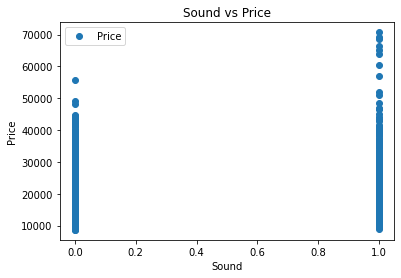

,Sound_SqrRt,Price
Sound_SqrRt,1.000000,-0.124348
Price,-0.124348,1.000000


In [28]:
df['Sound_SqrRt']= np.sqrt(df['Sound'])
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='Sound_SqrRt', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['Sound_SqrRt', 'Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


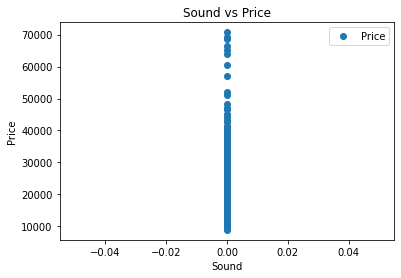

,logOf_Sound,Price
logOf_Sound,NaN,NaN
Price,NaN,1.0


In [29]:
df['logOf_Sound']= np.log(df['Sound'])
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='logOf_Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['logOf_Sound', 'Price']].corr()

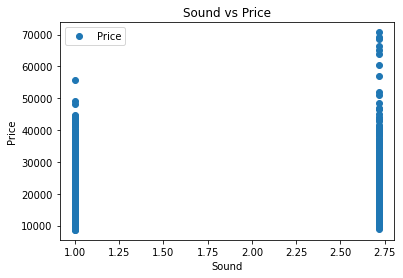

,Sound_exponent,Price
Sound_exponent,1.000000,-0.124348
Price,-0.124348,1.000000


In [30]:
df['Sound_exponent']= np.exp(df['Sound'])
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='Sound_exponent', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['Sound_exponent', 'Price']].corr()

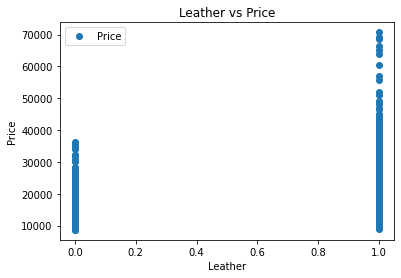

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [31]:
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather', 'Price']].corr()

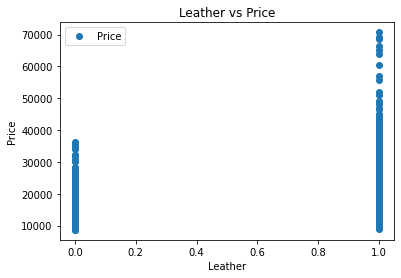

,Leather_sqr,Price
Leather_sqr,1.000000,0.157197
Price,0.157197,1.000000


In [32]:
df['Leather_sqr']= np.square(df['Leather'])
#df.groupby('Leather_sqr')['Price'].mean().plot()
df.plot(x='Leather_sqr', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather_sqr', 'Price']].corr()

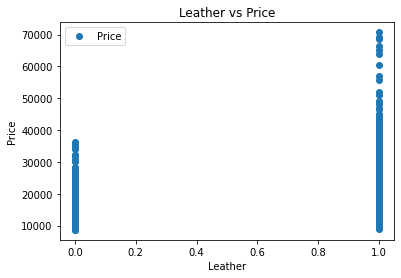

,Leather_cube,Price
Leather_cube,1.000000,0.157197
Price,0.157197,1.000000


In [33]:
df['Leather_cube']= pow(df['Leather'], 3)
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='Leather_cube', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather_cube', 'Price']].corr()

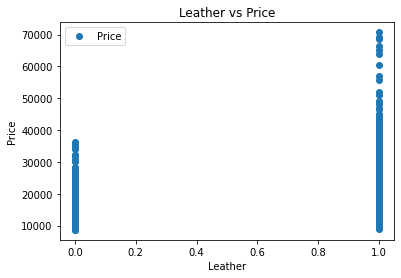

,Leather_SqrRt,Price
Leather_SqrRt,1.000000,0.157197
Price,0.157197,1.000000


In [34]:
df['Leather_SqrRt']= np.sqrt(df['Leather'])
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='Leather_SqrRt', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather_SqrRt', 'Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


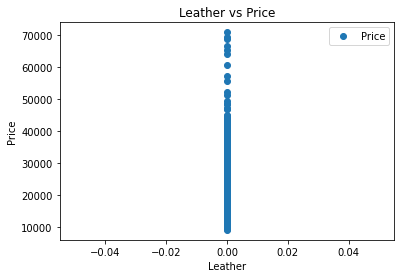

,logOf_Leather,Price
logOf_Leather,NaN,NaN
Price,NaN,1.0


In [35]:
df['logOf_Leather']= np.log(df['Leather'])
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='logOf_Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['logOf_Leather', 'Price']].corr()

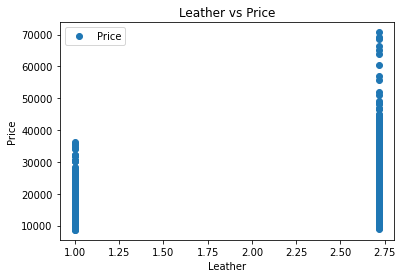

,Leather_exponent,Price
Leather_exponent,1.000000,0.157197
Price,0.157197,1.000000


In [36]:
df['Leather_exponent']= np.exp(df['Leather'])
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='Leather_exponent', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather_exponent', 'Price']].corr()

In [91]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


##TASK, PART 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [59]:
from sklearn.model_selection import train_test_split #For spliting data into test_data and train_data
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression           #importing all the required functions

In [60]:
X= df[['Mileage']].values  # Mileage-- array of features
Y= df['Price'].values  # Price-- array of targerts
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # random_state= 4)
#Y_test

#------------------------------------------
#MODELLING

regressor = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor.fit(X_train, Y_train)                             #Learning happens - GD is done and we get the final values of m and c


Y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
#Y_pred

In [61]:
print("m: ",regressor.coef_[0]) #m
print("c: ",regressor.intercept_) # c

m:  -0.17155622951762226
c:  24712.594101182436


###**1**. Find the linear regression equation for mileage vs price.



In [62]:
#y = m * x + c

print("Predicted Price of Car (Y) = {} * Miles_covered_by_Car (x) + {}".format(regressor.coef_[0],regressor.intercept_))

Predicted Price of Car (Y) = -0.17155622951762226 * Miles_covered_by_Car (x) + 24712.594101182436


###**2.** Chart the original data and the equation on the chart.

In [63]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,29664.702687,21038.202777
1,14072.135232,22099.278057
2,15086.899592,20005.434276
3,40966.607412,23430.039729
4,68566.187189,23611.203108
...,...,...
237,38824.869086,20258.994383
238,28291.762261,20882.086609
239,17162.478255,21984.335383
240,17115.122031,20516.157171


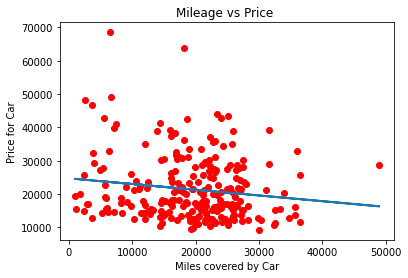

In [64]:
plt.plot(X_test, Y_test, 'or')
plt.plot(X_test, Y_pred, linewidth= 2)
plt.title('Mileage vs Price ')
plt.xlabel('Miles covered by Car')
plt.ylabel('Price for Car')
plt.show()

###**3.** Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.

In [67]:
from sklearn import metrics

if regressor.score(X_test,Y_test) < 0.8:
  print("R2 Score is:", regressor.score(X_test,Y_test), ' and so is not a good fit')
else:
  print("R2 Score is:", regressor.score(X_test,Y_test), ' and so is a good fit')
  
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

R2 Score is: 0.020810451576005362  and so is not a good fit
R2- SCORE: 0.020810451576005362


##TASK, PART 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [68]:
from sklearn.model_selection import train_test_split #For spliting data into test_data and train_data
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression           #importing all the required functions

In [69]:
X= df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values  # Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather-- array of features
Y= df['Price'].values  # Price-- array of targerts
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # random_state= 4)
#Y_test

#-----------------------------------------
#SCALING THE FEATURES

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
    #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA

X_train_scaled = scaler.transform(X_train) # normalizing the training data

X_test_scaled = scaler.transform(X_test) # normalizing the test data 

#------------------------------------------
#MODELLING

regressor = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor.fit(X_train_scaled, Y_train)                             #Learning happens - GD is done and we get the final values of m and c


Y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
#Y_pred

###**1.** Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [70]:
print("c: ",regressor.intercept_) # c
print("m1, m2 , m3, m4, m5, m6, m7: ",regressor.coef_)

c:  21480.866117012512
m1, m2 , m3, m4, m5, m6, m7:  [-1830.30068253  4616.30400552    76.44360139  -784.98956685
  2674.98559163  -694.90481315  1442.60716826]


In [71]:
#y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + m5 * x5 + c Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather

print("Predicted Price of Car(Y_pred) = {} * Mileage(x1) + {} * Cylinder(x2) + {} * Liter(x3) + {} * Doors(x4) + {} *  Cruise(x5) + {} *  Sound(x6) + {} *  Leather(x7) + {}".
      format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.coef_[5],regressor.coef_[6],regressor.intercept_))

Predicted Price of Car(Y_pred) = -1830.30068252994 * Mileage(x1) + 4616.304005524001 * Cylinder(x2) + 76.44360139013975 * Liter(x3) + -784.989566847601 * Doors(x4) + 2674.9855916292977 *  Cruise(x5) + -694.9048131518732 *  Sound(x6) + 1442.6071682597599 *  Leather(x7) + 21480.866117012512


In [72]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,44749.686793,37131.241208
1,11394.886403,11158.655767
2,33248.342524,20309.828749
3,11070.060643,11076.663497
4,31431.130370,27202.302739
...,...,...
237,13811.155022,12800.237234
238,11096.857268,16732.680576
239,27548.629610,32508.284196
240,16041.685586,20349.263828


###**2.** Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. 

In [78]:
from sklearn import metrics
if regressor.score(X_test_scaled,Y_test) < 0.8:
  print("R2 Score is:", regressor.score(X_test_scaled,Y_test), ' and so is not a good fit')
else:
  print("R2 Score is:", regressor.score(X_test_scaled,Y_test), ' and so is a good fit')

print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

R2 Score is: 0.37116828187865625  and so is not a good fit
R2- SCORE: 0.37116828187865625


###**3.** Find the combination of the factors that is the best predictor for price.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
  dict_of_r2scores= {}
  rand_st= random.randint(1, 50)
  #print(rand_st)
  maxR2Score= 0
  maxFeature = []

  # Price-- array of targerts
  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df[list(combo)].values
        Y= df['Price'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train, Y_train)  #FITTING

        #Y_pred = regressor1.predict(X_test_scaled)
        scores = cross_val_score(regressor1, X_train_scaled, Y_train, cv= 10)
        #print(np.mean(scores))

        #-----------------------------------------

        #if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   #R2- Score
        #  maxR2Score= metrics.r2_score(Y_test,Y_pred)
        #  maxFeature= list(combo)
        #dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)
        if np.mean(scores) > maxR2Score:
          maxR2Score= np.mean(scores)
          maxFeature = list(combo)
        #dict_of_r2scores[str(list(combo))] = np.mean(scores)

  print("Best Features to predict PRICE IS",maxFeature," and the R2 Score is:", maxR2Score)
  #for k in dict_of_r2scores.keys():
  #  print(k,":", dict_of_r2scores[k])

findMaxR2Score()

Best Features to predict PRICE IS ['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']  and the R2 Score is: 0.40874156002386924


##TASK, PART 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

###**1.** Research dummy variables in scikit-learn to see how to use the make, model, and body type.

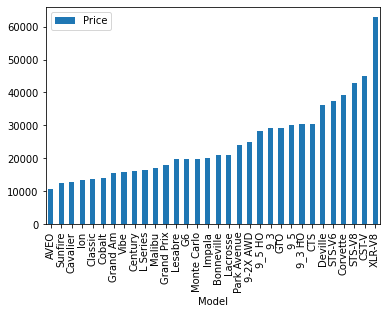

In [92]:
df_modpri = df[['Model','Price']]
df_modpri = df_modpri.groupby('Model').mean().sort_values(by=['Price'])
#print(df_modpri)
df_modpri.plot.bar()

We can see a linear trend between Model and Price. Hence, we can Label Encode the Model columns, thereby replacing the String values with their corrsponding numeric value.

In [93]:
i=1
dic= {}
for inde in df_modpri.index:
  dic[inde]= i
  i += 1
print(dic)
df['Model']= df['Model'].map(dic)
df

{'AVEO': 1, 'Sunfire': 2, 'Cavalier': 3, 'Ion': 4, 'Classic': 5, 'Cobalt': 6, 'Grand Am': 7, 'Vibe': 8, 'Century': 9, 'L Series': 10, 'Malibu': 11, 'Grand Prix': 12, 'Lesabre': 13, 'G6': 14, 'Monte Carlo': 15, 'Impala': 16, 'Bonneville': 17, 'Lacrosse': 18, 'Park Avenue': 19, '9-2X AWD': 20, '9_5 HO': 21, '9_3': 22, 'GTO': 23, '9_5': 24, '9_3 HO': 25, 'CTS': 26, 'Deville': 27, 'STS-V6': 28, 'Corvette': 29, 'STS-V8': 30, 'CST-V': 31, 'XLR-V8': 32}


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,9,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,9,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,9,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,9,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,9,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,10,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,10,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,10,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,10,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


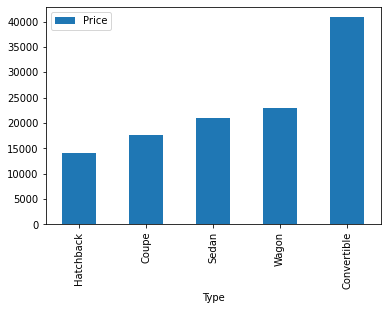

In [94]:
df_typpri = df[['Type','Price']]
df_typpri = df_typpri.groupby('Type').mean().sort_values(by='Price')
df_typpri.plot.bar()

We can see a linear trend between Type and Price. Hence, we can Label Encode the Type columns, thereby replacing the String values with their corrsponding numeric value.

In [95]:
df['Type']= df['Type'].map({'Hatchback': 1, 'Coupe': 2, 'Sedan': 3, 'Wagon': 4, 'Convertible': 5})
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,9,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,9,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,9,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,9,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,9,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,10,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,10,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,10,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,10,L300 Sedan 4D,3,6,3.0,4,1,1,0


One hot encoding 'Make' Column, replacing its string values with numeric values. Removing the Trim column.

In [86]:
df_new = pd.get_dummies(df,columns = ['Make']) #one hot encoding
df_new.drop('Trim', axis=1, inplace=True)
df_new

,Price,Mileage,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,17314.103129,8221,9,3,6,3.1,4,1,1,1,1,0,0,0,0,0
1,17542.036083,9135,9,3,6,3.1,4,1,1,0,1,0,0,0,0,0
2,16218.847862,13196,9,3,6,3.1,4,1,1,0,1,0,0,0,0,0
3,16336.913140,16342,9,3,6,3.1,4,1,0,0,1,0,0,0,0,0
4,16339.170324,19832,9,3,6,3.1,4,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,10,3,6,3.0,4,1,0,0,0,0,0,0,0,1
800,16175.957604,19095,10,3,6,3.0,4,1,1,0,0,0,0,0,0,1
801,15731.132897,20484,10,3,6,3.0,4,1,1,0,0,0,0,0,0,1
802,15118.893228,25979,10,3,6,3.0,4,1,1,0,0,0,0,0,0,1


###**2.** Find the best combination of factors to predict price.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools


def findMaxR2Score():
  features = list(df_new.columns)
  features.remove('Price')
  dict_of_r2scores= {}
  #rand_st= random.randint(1, 50)
  #print(rand_st)
  maxR2Score= 0
  maxFeature = []

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:
  
        X= df_new[list(combo)].values
        Y= df_new['Price'].values
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 5) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)

        #-----------------------------------------

        if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   #R2- Score
          maxR2Score= metrics.r2_score(Y_test,Y_pred)
          maxFeature= list(combo)
        #dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  print("The Best Combination of features to predict PRICE ARE: ",maxFeature," and \nthe R2 Score is:", maxR2Score)
  #for k in dict_of_r2scores.keys():
  #  print(k,":", dict_of_r2scores[k])

findMaxR2Score()

The Best Combination of features to predict PRICE ARE:  ['Mileage', 'Model', 'Type', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac']  and 
the R2 Score is: 0.930820166094255


We can also perform Recursive Feature Elimination with Cross Validation to remove features of low importance and then create the LinearRegression model.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFECV

X= df_new.iloc[:, 1:]
Y= df_new['Price'].values

re= LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state= 5)

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
          #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
X_train_scaled = scaler.transform(X_train) # normalizing the training data
X_test_scaled = scaler.transform(X_test) # normalizing the test data

rfecv = RFECV(estimator= re, cv= 5, step=1)
rfecv = rfecv.fit(X_train_scaled, Y_train)

#selected_rfe_features= pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_, 'Support: ': rfe.support_})
#selected_rfe_features.sort_values(by='Ranking')
#print(selected_rfe_features)

regressor1 = LinearRegression()  #INITIALIZATION
regressor1.fit(rfecv.transform(X_train_scaled), Y_train)  #FITTING

Y_pred = regressor1.predict(rfecv.transform(X_test_scaled))

#print(pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}))
print('The Best Combination of features to predict PRICE ARE: ',list(X_train.columns[rfecv.support_]))
print("and the R2 Score is: ", metrics.r2_score(Y_test,Y_pred))

The Best Combination of features to predict PRICE ARE:  ['Mileage', 'Model', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn']
and the R2 Score is:  0.9280904491957204
